<a href="https://colab.research.google.com/github/Madhuripilli99/Madhuri_INFO5731_Spring2025/blob/main/Madhuri_Pilli_Assignment_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
import pandas as pd
from collections import defaultdict


file_path = "/content/cleaned_Bigdata_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()


def tokenize(text):
    text = text.lower()  # Convert to lowercase
    # Use regex to split words, remove punctuation, etc.
    words = re.findall(r'\b\w+\b', text)
    return words

def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i + n]))
    return ngrams


def count_ngrams(dataset, n):
    ngram_freq = defaultdict(int)
    for review in dataset:
        tokens = tokenize(review)
        ngrams = generate_ngrams(tokens, n)
        for ngram in ngrams:
            ngram_freq[ngram] += 1
    return ngram_freq

# Task 2: Calculate bigram probabilities
def calculate_bigram_probabilities(dataset):
    bigram_freq = defaultdict(int)
    unigram_freq = defaultdict(int)

    for review in dataset:
        tokens = tokenize(review)
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            unigram_freq[tokens[i]] += 1
            bigram_freq[bigram] += 1

    bigram_probabilities = defaultdict(float)
    for bigram, count in bigram_freq.items():
        w1 = bigram[0]
        if unigram_freq[w1] > 0:
            bigram_probabilities[bigram] = count / unigram_freq[w1]

    return bigram_probabilities

# Task 3: Extract noun phrases and calculate relative probabilities



def extract_noun_phrases(dataset):
    noun_phrases = defaultdict(int)
    for review in dataset:
        tokens = tokenize(review)

        for token in tokens:
            if len(token) > 3:
                noun_phrases[token] += 1
    return noun_phrases


def calculate_noun_phrase_probabilities(dataset, noun_phrases):
    max_freq = max(noun_phrases.values())
    relative_probabilities = {}

    for review in dataset:
        tokens = tokenize(review)
        review_freq = defaultdict(int)


        for token in tokens:
            if len(token) > 3:
                review_freq[token] += 1


        relative_probabilities_for_review = {}
        for noun_phrase, count in review_freq.items():
            relative_probabilities_for_review[noun_phrase] = count / max_freq

        relative_probabilities[review] = relative_probabilities_for_review

    return relative_probabilities




noun_phrases = extract_noun_phrases(documents)


relative_probabilities = calculate_noun_phrase_probabilities(documents, noun_phrases)

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(documents)


noun_phrase_list = list(noun_phrases.keys())


data = []
for review in documents:
    review_probabilities = relative_probabilities.get(review, {})
    review_bigrams = defaultdict(float)
    tokens = tokenize(review)

    # For each possible bigram, retrieve the probability from bigram_probabilities
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i + 1])
        if bigram in bigram_probabilities:
            review_bigrams[bigram] = bigram_probabilities[bigram]


    row = []
    # Add noun phrase probabilities
    for noun_phrase in noun_phrase_list:
        row.append(review_probabilities.get(noun_phrase, 0))  # If noun phrase not found, use 0

    # Add bigram probabilities (for each bigram in the review)
    for bigram in bigram_probabilities.keys():
        row.append(review_bigrams.get(bigram, 0))  # If bigram not found, use 0

    data.append(row)


columns = noun_phrase_list + [f"{bigram[0]}_{bigram[1]}" for bigram in bigram_probabilities.keys()]

df_noun_phrase_and_bigram_probabilities = pd.DataFrame(data, columns=columns, index=[f"Review {i+1}" for i in range(len(documents))])

# Print out the DataFrame (table of noun phrase and bigram probabilities)
print("\nRelative Probabilities for Noun Phrases and Bigram Probabilities (Reviews x Noun Phrases & Bigrams):")
print(df_noun_phrase_and_bigram_probabilities)



Relative Probabilities for Noun Phrases and Bigram Probabilities (Reviews x Noun Phrases & Bigrams):
           bigdata  aiinbusiness  advancedanalytics  datadrivendecisions  \
Review 1      0.01          0.01               0.01                 0.01   
Review 2      0.01          0.00               0.00                 0.00   
Review 3      0.01          0.00               0.00                 0.00   
Review 4      0.01          0.00               0.00                 0.00   
Review 5      0.01          0.00               0.00                 0.00   
...            ...           ...                ...                  ...   
Review 95     0.01          0.00               0.00                 0.00   
Review 96     0.01          0.00               0.00                 0.00   
Review 97     0.01          0.00               0.00                 0.00   
Review 98     0.01          0.00               0.00                 0.00   
Review 99     0.01          0.00               0.00           

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import spacy
from collections import Counter, defaultdict
import math

nlp = spacy.load("en_core_web_sm")


dataset_path = ('/content/cleaned_Bigdata_Tweets.csv')
with open(dataset_path, "r") as file:
    documents = file.readlines()

documents = [nlp(doc.lower()) for doc in documents]


tokenized_docs = [[token.text for token in doc if not token.is_punct] for doc in documents]

def compute_tf(doc):
    term_count = Counter(doc)
    total_terms = len(doc)
    return {term: count / total_terms for term, count in term_count.items()}

tf_matrix = [compute_tf(doc) for doc in tokenized_docs]

idf_count = Counter(term for doc in tokenized_docs for term in set(doc))
num_docs = len(tokenized_docs)
idf = {term: math.log(num_docs / (1 + count)) for term, count in idf_count.items()}

# Compute TF-IDF Matrix
tf_idf_matrix = [{term: tf * idf[term] for term, tf in tf_doc.items()} for tf_doc in tf_matrix]

# Display sample TF-IDF values
for i, doc in enumerate(tf_idf_matrix[:5]):
    print(f"Document {i + 1} TF-IDF:")
    for term, value in list(doc.items())[:10]:
        print(f"{term}: {value:.4f}")
    print("-")

Document 1 TF-IDF:
tweet_id: 0.7824
user_id: 0.7824
tweet_time: 0.7824
tweettext: 0.7824

: -0.0020
-
Document 2 TF-IDF:
1892399658145595522,1888728911288385536,2025: 0.1863
02: 0.0000
20: 0.0112
02:23:32: 0.1863
+: 0.0000
00:00,bigdata: 0.1670
aiinbusiness: 0.1863
advancedanalytics: 0.1863
datadrivendecisions: 0.1863
businessintelligence: 0.1863
-
Document 3 TF-IDF:
1892396798573990338,1887445725988200452,2025: 0.0869
02: 0.0000
20: 0.0052
02:12:10: 0.0869
+: 0.0000
00:00,kadena: 0.0779
bullrun: 0.0779
kda: 0.2338
flux: 0.0779
btc: 0.1431
-
Document 4 TF-IDF:
1892396774075031840,1887445725988200452,2025: 0.0869
02: 0.0000
20: 0.0052
02:12:04: 0.0869
+: 0.0000
00:00,kadena: 0.0779
bullrun: 0.0779
kda: 0.2338
flux: 0.0779
btc: 0.1431
-
Document 5 TF-IDF:
1892395073423151479,855649514937434112,2025: 0.1863
02: 0.0000
20: 0.0112
02:05:19: 0.1863
+: 0.0000
00:00,safe: 0.1863
safe: 0.1863
studio: 0.1863
ipmoguide: 0.2293
httpstcopmylkelcne: 0.1863
-


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


file_path = "/content/cleaned_Bigdata_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()


query = "Main challenges in bigdata analytics"


vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(documents + [query])


cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()


ranked_docs = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Display ranked documents
for rank, (index, score) in enumerate(ranked_docs, start=1):
    print(f"Rank {rank}: Document {index} (Score: {score:.4f})")


Rank 1: Document 69 (Score: 0.0860)
Rank 2: Document 5 (Score: 0.0762)
Rank 3: Document 68 (Score: 0.0738)
Rank 4: Document 73 (Score: 0.0598)
Rank 5: Document 67 (Score: 0.0482)
Rank 6: Document 4 (Score: 0.0104)
Rank 7: Document 7 (Score: 0.0104)
Rank 8: Document 8 (Score: 0.0104)
Rank 9: Document 9 (Score: 0.0104)
Rank 10: Document 10 (Score: 0.0104)
Rank 11: Document 11 (Score: 0.0104)
Rank 12: Document 12 (Score: 0.0104)
Rank 13: Document 13 (Score: 0.0104)
Rank 14: Document 14 (Score: 0.0104)
Rank 15: Document 15 (Score: 0.0104)
Rank 16: Document 16 (Score: 0.0104)
Rank 17: Document 17 (Score: 0.0104)
Rank 18: Document 18 (Score: 0.0104)
Rank 19: Document 19 (Score: 0.0104)
Rank 20: Document 20 (Score: 0.0104)
Rank 21: Document 21 (Score: 0.0104)
Rank 22: Document 22 (Score: 0.0104)
Rank 23: Document 24 (Score: 0.0104)
Rank 24: Document 25 (Score: 0.0104)
Rank 25: Document 26 (Score: 0.0104)
Rank 26: Document 27 (Score: 0.0104)
Rank 27: Document 28 (Score: 0.0104)
Rank 28: Docume

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import string
import numpy as np
import gensim
from gensim.models import Word2Vec



def preprocess_text(text):


    # Tokenize the text by splitting it into words
    words = text.split()



    return words

file_path = "/content/cleaned_Bigdata_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()

preprocessed_corpus = [preprocess_text(sentence) for sentence in documents]


model = Word2Vec(sentences=preprocessed_corpus, vector_size=300, window=5, min_count=1, sg=0)


model.save("word2vec_model_300dim.model")



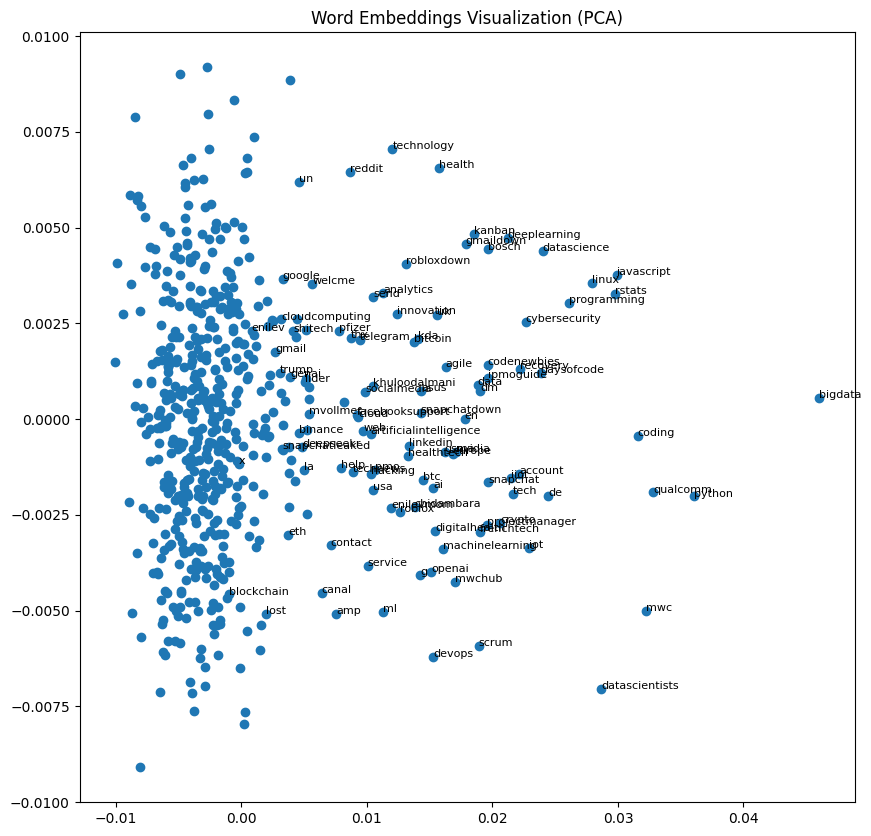

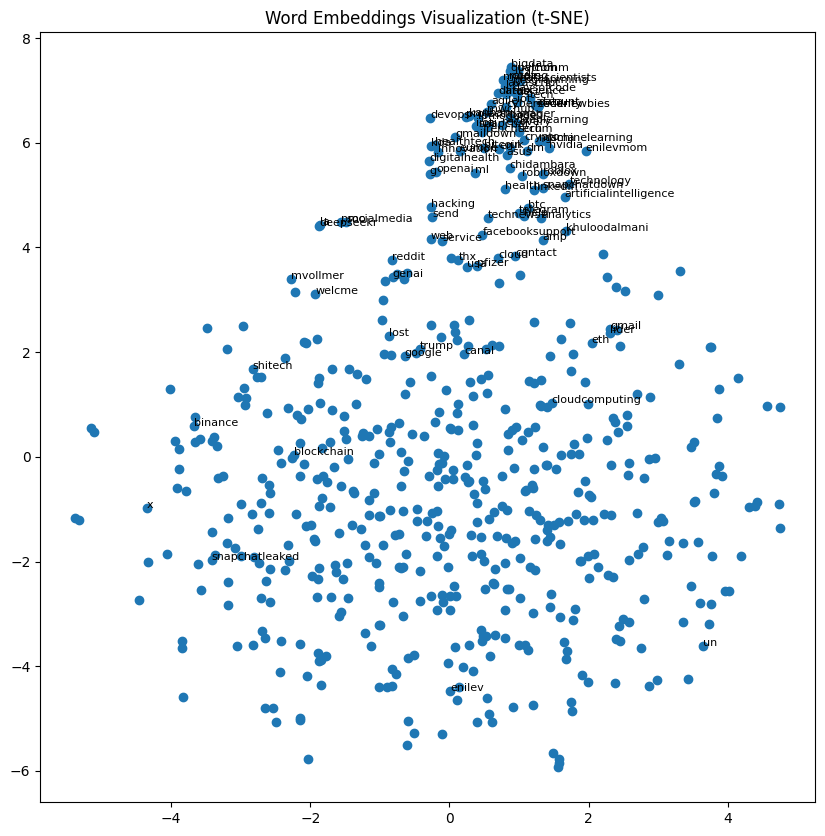

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np


words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])  # Convert to NumPy array

# PCA - Reduce the word embeddings to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words[:100]):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("Word Embeddings Visualization (PCA)")
plt.show()

# t-SNE - Reduce the word embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=300)  # 'n_iter' is renamed to 'max_iter'
tsne_result = tsne.fit_transform(word_vectors)  # Now it's a NumPy array


plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words[:100]):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)

plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between two words
def get_cosine_similarity(word1, word2, model):

    vec1 = model.wv[word1].reshape(1, -1)
    vec2 = model.wv[word2].reshape(1, -1)

    # Compute cosine similarity
    similarity = cosine_similarity(vec1, vec2)
    return similarity[0][0]


word_pairs = [
    ("bigdata", "ecosystem"),
    ("crypto", "safe"),
    ("openai", "insightful"),
    ("vision", "innovation"),
    ("health", "web")
]

# Calculate and print cosine similarity
for word1, word2 in word_pairs:
    similarity = get_cosine_similarity(word1, word2, model)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")


Cosine similarity between 'bigdata' and 'ecosystem': 0.1701
Cosine similarity between 'crypto' and 'safe': 0.1212
Cosine similarity between 'openai' and 'insightful': 0.0387
Cosine similarity between 'vision' and 'innovation': 0.0349
Cosine similarity between 'health' and 'web': 0.3404


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# my Github link


# Link:
https://github.com/Madhuripilli99/Madhuri_INFO5731_Spring2025/blob/main/annotated_bigdata_tweets.csv


For the dataset, the most suitable NLP task is Sentiment Analysis. My dataset itself consists of tweets with their sentiment labels and can be used to predict or classify emotions in text. Applications fall in the area of Sentiment Analysis like understanding user opinion, trends and reactions from the social data. Businesses and researchers can also determine public perception of several issues by analysing sentiment. Classification of this task can be automated using the machine or deep learning models.

Considering the dataset consists of sentiment data labelled, each tweet is assigned a sentiment label. The text represents the sentiment conveyed in the labels which have already been predefined. sentiment and a category is assigned to each tweet based upon a certain tone of the tweet. It provides consistency for the classification and is helpful all in training sentiment analysis models. The labeled data can serve as the basis for building classifiers that will predict sentiment of new unseen text.

There are three main labels in the dataset: Positive, Negative and Neutral. Tweets which are optimistic, satisfied, or enthusiastic are labeled with the Positive label. Tweets that imply criticism, dissatisfaction or an unfavorable opinion are tagged as Negative label. Tweets not expressing strong positive or negative sentiments are given a Neutral label. So, these labels give a structured way of analysing the emotional tone of text data.

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment. Share any suggestions for improvement. Your feedback will be valuable for enhancing the learning experience.

 I felt the assignment is bit challenging. Generating code and Fixing the errors in  codes was challenging for me but at the same time I enjoyed writing code. I felt the given time is good enough to complete this kind of assignment.

In [ ]:
# Type your answer